In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastcore.all import *
from fastdownload import download_url

from fastai.vision.all import *


In [3]:
from pathlib import Path

In [4]:
import shutil

source_dir = "/kaggle/input/balltrain"

# Destination directory
destination_dir = "/kaggle/working/balltrain"

shutil.copytree(source_dir, destination_dir)

'/kaggle/working/balltrain'

In [5]:
##testing fastai with just one image section
path = Path("/kaggle/input/balltrain")
path.ls()

(#1) [Path('/kaggle/input/balltrain/train')]

In [6]:
files = get_image_files(path/"train")
print(len(files))

7327


In [7]:
pat = r'^(.*)_\d+.jpg'


In [8]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

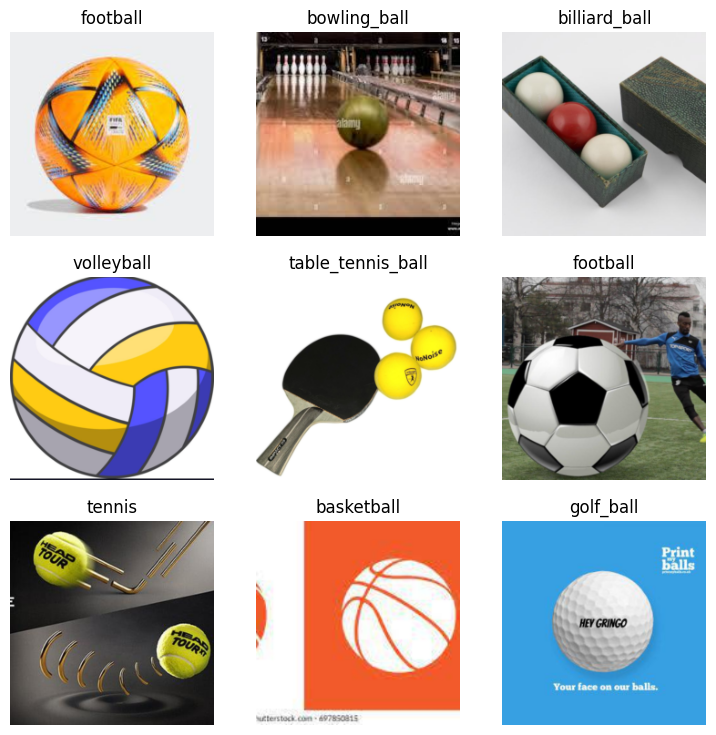

In [9]:
dls.show_batch()


In [10]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

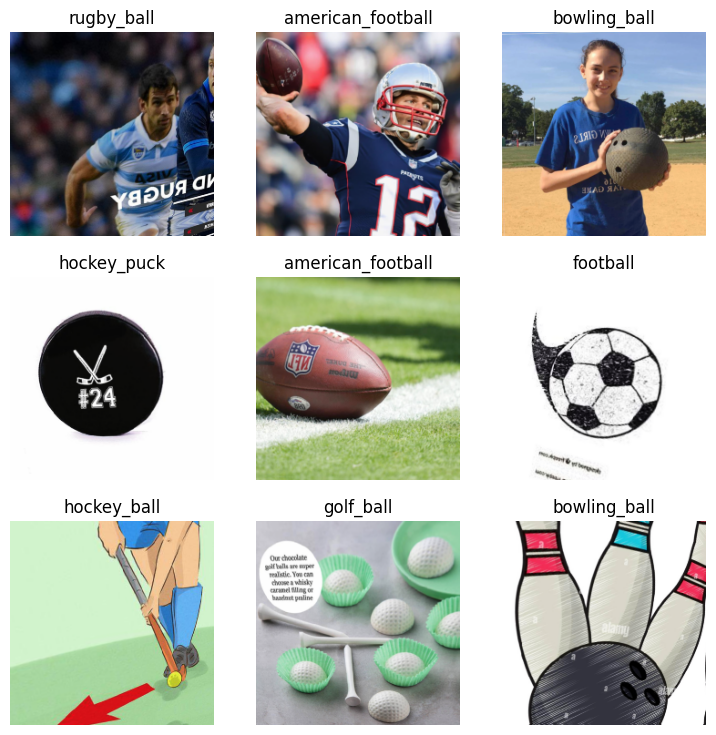

In [11]:
dls.show_batch()


In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate, model_dir = "/kaggle/working/models")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 80.3MB/s]


/opt/conda/lib/python3.10/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0012022644514217973)

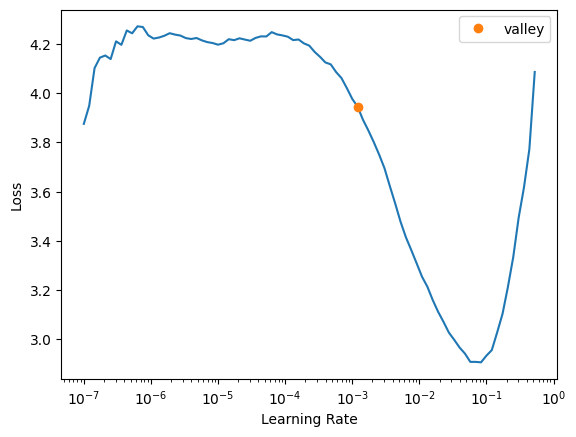

In [13]:
learn.lr_find()

In [14]:
learn.fine_tune(5, 0.0008317637839354575)


epoch,train_loss,valid_loss,error_rate,time
0,2.116646,0.753678,0.224573,00:45


epoch,train_loss,valid_loss,error_rate,time
0,1.018841,0.541838,0.156997,00:48
1,0.738367,0.404818,0.119454,00:48
2,0.503755,0.358058,0.103754,00:49
3,0.345633,0.321772,0.090102,00:48
4,0.262799,0.323723,0.090102,00:48


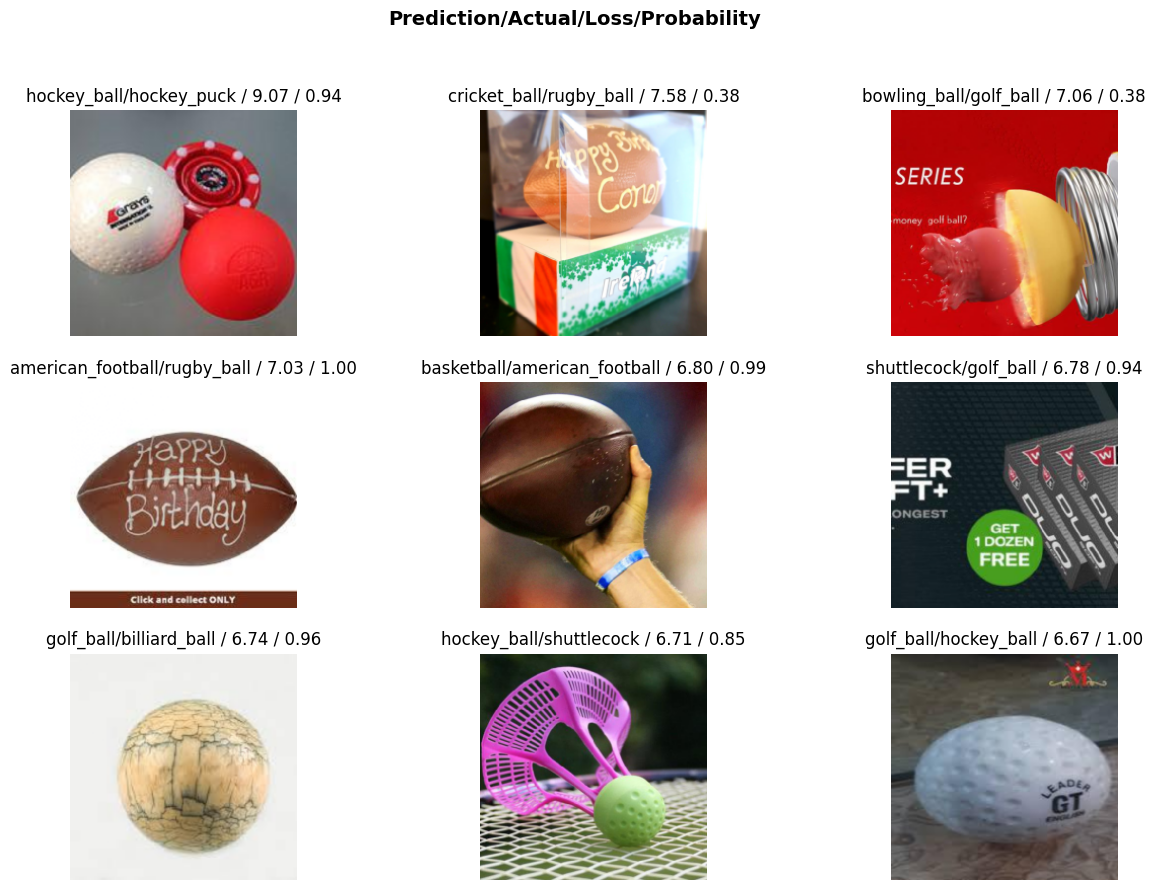

In [15]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))


In [16]:
learn.export(Path("/kaggle/working/ball_classif.pkl"))

